In [1]:
import math
import random
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
from board import Battleship

In [3]:
from utils import display_heatmap, plot_population_stats

## Setup The Target Board

In [4]:
battleship_board, battleship_solution = Battleship().create_board()

Correct number of pieces on board.


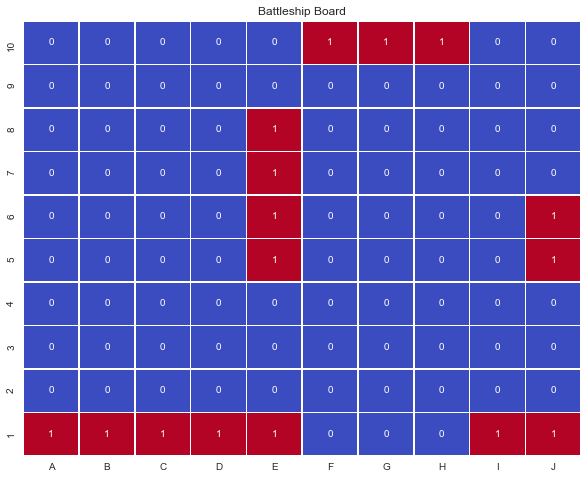

In [5]:
display_heatmap(data=battleship_board)

## Create a Random Guess

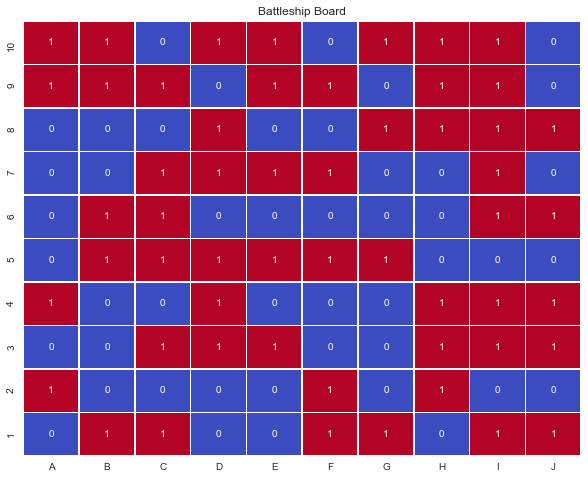

In [6]:
random_solution = np.random.randint(2, size=100).reshape((10, 10))

display_heatmap(data=random_solution)

## Define PSO

In [7]:
W = 0.5
C1 = 0.8
C2 = 0.9

In [ ]:
class Particle(object):
    
    def __init__(self):
        
        pass

---